# Delicious Asian and Indian Cuisines 

## Tasks
1. Learn the data
2. What are the questions you can ask? What kind of application can you build with the data?
+ Given a list of ingredient, what cuisine can you make?
3. Resample the data

In [1]:
import pandas as pd
df = pd.read_csv("../data/cuisines.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [3]:
print(df.columns)

Index(['Unnamed: 0', 'cuisine', 'almond', 'angelica', 'anise', 'anise_seed',
       'apple', 'apple_brandy', 'apricot', 'armagnac',
       ...
       'whiskey', 'white_bread', 'white_wine', 'whole_grain_wheat_flour',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=385)


count       2448
unique         5
top       korean
freq         799
Name: cuisine, dtype: object
0
['indian' 'thai' 'chinese' 'japanese' 'korean']
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


<AxesSubplot:>

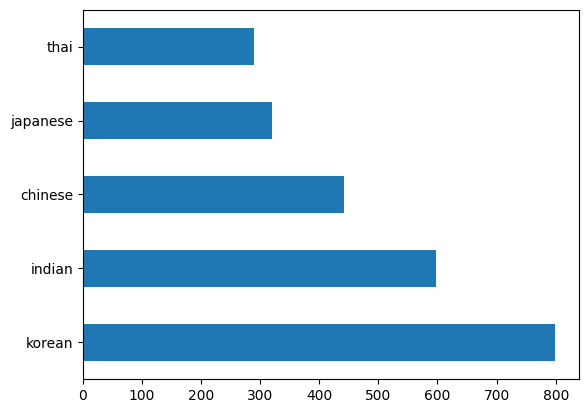

In [4]:
print(df.cuisine.describe())
print(df.cuisine.isna().sum())
print(df.cuisine.unique())
print(df.cuisine.value_counts())
df.cuisine.value_counts().plot.barh()

In [5]:
df.cuisine.value_counts() * 100 / df.shape[0]

korean      32.638889
indian      24.428105
chinese     18.055556
japanese    13.071895
thai        11.805556
Name: cuisine, dtype: float64

In [9]:
# check missing values
(df.isna().sum() > 0).sum()

0

### How many columns are there, what are they
There are 385 columns. One column is "cuisine", 383 columns are ingredient names, one column is 'Unamed: 0'
1. **cuisine** 
> has 5 unique values. Each row has cuisine, no missing value. The 5 cuisines are "indian", "thai", "chinese", "japanese" and "korean". There are 2448 records. Korean cusine is the most popular cuisine. thai has the least record.\
>Korean cuisine is 32.6%. Thai is 11.8%, Japanese is 13.07%

2. No missing value in any of the column
3. There are 2448 records.
4. Unnamed: 0 is numeric. Other columns are binary.  99 columns are all 0 or 1.
5. After dropping "Unnamed: 0" and the 99 columns. There are 284 ingredients.

In [10]:
# check if all ingredients columns are binary
ingredient_columns = [x for x in df.columns if x != 'cuisine']
non_binary = []
for col in ingredient_columns:
    if(df[(df[col] != 0) & (df[col] != 1)].size > 0):
        non_binary += [col]

print(f"{len(non_binary)} columns are not binary: {non_binary}")

1 columns are not binary: ['Unnamed: 0']


In [11]:
df["Unnamed: 0"].describe()

count     2448.000000
mean     16040.551471
std      13625.719887
min         65.000000
25%      10907.750000
50%      15263.500000
75%      16926.250000
max      57690.000000
Name: Unnamed: 0, dtype: float64

In [12]:
## find columns that all zero or all one
columns = []
total = df.shape[0]
for col in ingredient_columns:
    if (df[df[col] == 0].shape[0] == total):
        columns += [col]

    if (df[df[col] == 1].shape[0] == total):
        columns += [col]

print(f"{len(columns)} columns are all 0 or 1. {columns}")

99 columns are all 0 or 1. ['angelica', 'apple_brandy', 'armagnac', 'artichoke', 'baked_potato', 'balm', 'bartlett_pear', 'bergamot', 'black_currant', 'black_raspberry', 'blackberry_brandy', 'blue_cheese', 'bourbon_whiskey', 'cabernet_sauvignon_wine', 'cacao', 'camembert_cheese', 'carnation', 'carob', 'cassava', 'cereal', 'chamomile', 'cherry_brandy', 'chicken_liver', 'clove', 'concord_grape', 'condiment', 'corn_grit', 'cottage_cheese', 'cured_pork', 'durian', 'elderberry', 'emmental_cheese', 'flower', 'geranium', 'grape_brandy', 'guava', 'hazelnut', 'herring', 'hop', 'huckleberry', 'jamaican_rum', 'jasmine_tea', 'juniper_berry', 'kaffir_lime', 'laurel', 'lavender', 'leaf', 'lilac_flower_oil', 'lingonberry', 'long_pepper', 'lovage', 'mate', 'munster_cheese', 'muscat_grape', 'mutton', 'nectarine', 'oat', 'orange_flower', 'ouzo', 'pear_brandy', 'pelargonium', 'peppermint_oil', 'pimenta', 'pimento', 'popcorn', 'pork_liver', 'port_wine', 'prickly_pear', 'quince', 'rapeseed', 'red_kidney_be

In [13]:
## drop these columns
df.drop(columns + ["Unnamed: 0"], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 285 entries, cuisine to zucchini
dtypes: int64(284), object(1)
memory usage: 5.3+ MB


In [16]:
## oversample
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
feature_columns = [c for c in df.columns if c != 'cuisine']
label_column = ["cuisine"]
X, y = oversample.fit_resample(df[feature_columns], df[label_column])


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 284 entries, almond to zucchini
dtypes: int64(284)
memory usage: 8.7 MB


<AxesSubplot:ylabel='cuisine'>

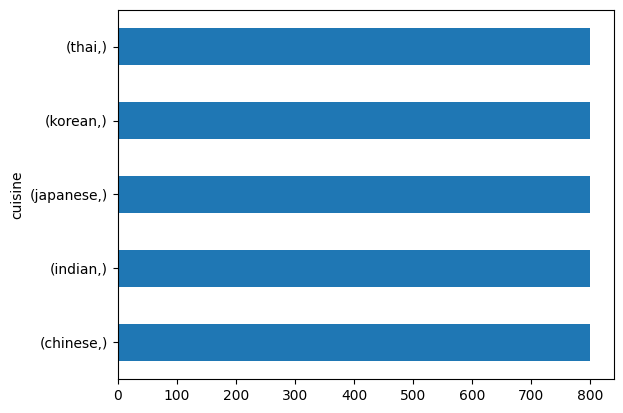

In [18]:
y.value_counts().plot.barh()

In [19]:
cleaned_data = pd.concat([X, y], axis=1)

In [20]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 285 entries, almond to cuisine
dtypes: int64(284), object(1)
memory usage: 8.7+ MB


In [26]:
cleaned_data.to_csv("../data/cleaned_cuisines_jiheng.csv", index=False)